In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flowers-recognition/flowers/dandelion/34578947551_863af3acb3_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/2625836599_03e192266f.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/16242239484_51286673af.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/5716633491_55e6f02645_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/34697163155_5dc2571f23_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/34686041416_e50c8028f9_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/8719032054_9a3ce4f0ff.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/9472854850_fc9e1db673.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/31530587330_ba31bd196e_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/9293460423_7fbb1e3c32_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/9939430464_5f5861ebab.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/2535769822_513be6bbe9.jpg
/kaggle/input/flowers-recognition/flowers/dande

In [2]:
!pip install -q split-folders

In [3]:
import os
import zipfile
import splitfolders 
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pandas as pd
import tensorflow as tf
import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


In [4]:
!ls ../input/flowers-recognition/flowers

daisy  dandelion  rose	sunflower  tulip


In [5]:
# Split the Dataset folders into train test val folders
splitfolders.ratio("../input/flowers-recognition/flowers", output="output", seed=100, ratio=(.8, .1, .1), group_prefix=None) 

Copying files: 4317 files [00:17, 240.72 files/s]


In [6]:
#create paths for folders 


daisy_dir = os.path.join('./output/train/daisy')
dandelion_dir = os.path.join('./output/train/dandelion')
rose_dir = os.path.join('./output/train/rose')
sunflower_dir = os.path.join('./output/train/sunflower')
tulip_dir = os.path.join('./output/train/tulip')

#count number of files in each directory
print('Total training Daisy images :',len(os.listdir(daisy_dir)))
print('Total training Dandelion images :',len(os.listdir(dandelion_dir)))
print('Total training Rose images :',len(os.listdir(rose_dir)))
print('Total training Sunflower images :',len(os.listdir(sunflower_dir)))
print('Total training Tulip images :',len(os.listdir(tulip_dir)))

print('\n')
daisy_files = os.listdir(daisy_dir)
dandelion_files = os.listdir(dandelion_dir)
rose_files = os.listdir(rose_dir)
sunflower_files = os.listdir(sunflower_dir)
tulip_files = os.listdir(tulip_dir)

print("Total len of training images",len(daisy_files+dandelion_files+rose_files+sunflower_files+tulip_files))

Total training Daisy images : 611
Total training Dandelion images : 841
Total training Rose images : 627
Total training Sunflower images : 586
Total training Tulip images : 787


Total len of training images 3452


In [7]:
#to plot images get complete paths for images
pic_index = 10

#get paths for some of the immages from each folder
daisy_fewimg = [os.path.join(daisy_dir,fname) for fname in daisy_files[pic_index-10:pic_index]]
dandelion_fewimg = [os.path.join(dandelion_dir,fname) for fname in dandelion_files[pic_index-10:pic_index]]
rose_fewimg = [os.path.join(rose_dir,fname) for fname in rose_files[pic_index-10:pic_index]]
sunflower_fewimg = [os.path.join(sunflower_dir,fname) for fname in sunflower_files[pic_index-10:pic_index]]
tulip_fewimg = [os.path.join(tulip_dir,fname) for fname in tulip_files[pic_index-10:pic_index]]


(240, 159, 3)


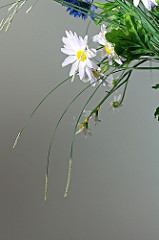

In [9]:
#plot random image 
import PIL.Image as Image

print(cv2.imread(daisy_fewimg[0]).shape)
Image.open(daisy_fewimg[0])

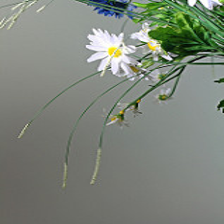

In [10]:
Image.open(daisy_fewimg[0]).resize((224,224))

In [11]:
#function to convert BGR image to RGB
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

In [12]:
#plot smaple of images function
def plot_img(imgpath_list):

  fig, ax = plt.subplots(3,3,figsize=(10,10))
  k = 0
  for j in range(3):
    for i in range(3):
        img = cv2.resize(cv2.imread(imgpath_list[k]),(224,224))
        k=k+1
        ax[i,j].imshow(cvtRGB(img));
        ax[i,j].axis('off');

				Daisy


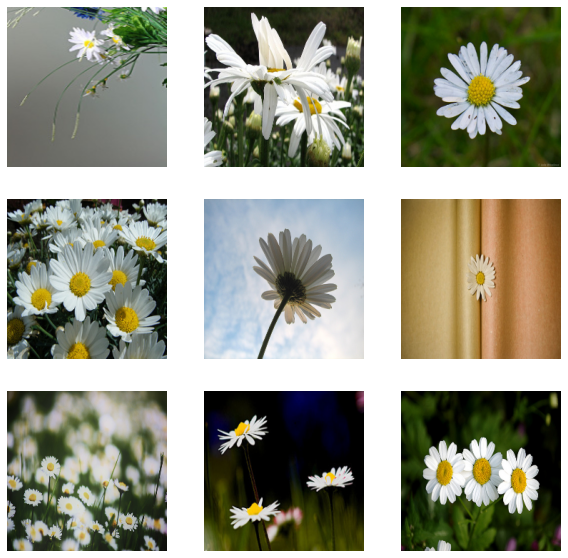

In [13]:
print('\t\t\t\tDaisy')
plot_img(daisy_fewimg)

				Rose


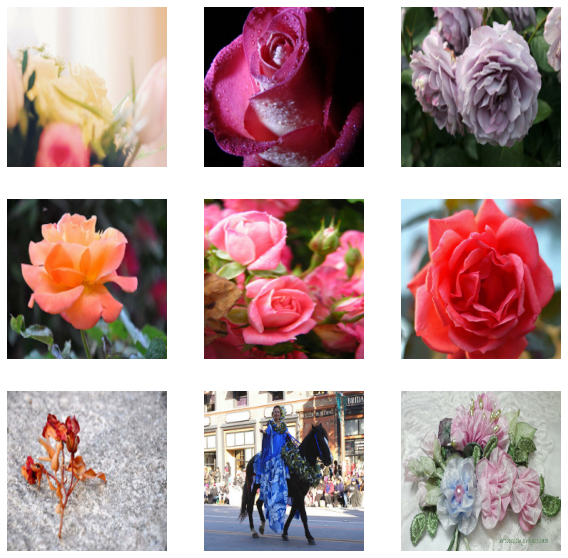

In [14]:
print('\t\t\t\tRose')
plot_img(rose_fewimg)

In [15]:
#image Augumentation using ImageDataGenerator on train data 
#Data augmentation is used to increase the size of training set and to get more different images
training_dir = './output/train/'
training_datagen = ImageDataGenerator(
    rescale = 1./255, #normalization
    rotation_range = 40,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.2,
    zoom_range = 0.1,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [17]:
#do not perform augmentation on validation and test data/validation set ,this might mislead the results
validation_dir = './output/val'
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

test_dir = './output/test'
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [18]:
#flow_from_directory() method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.
train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size = (224,224), #rescale images to fixed size
    class_mode = 'categorical',
    batch_size = 32
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [22]:
# Build CNN sequential model and train from scratch 
def model_from_scratch():
  #Build model
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3)),
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(512, activation = 'relu'),
              tf.keras.layers.Dense(5, activation = 'softmax')
  ])

  #model compilation
  model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']
            )
  
  return model

In [23]:
model_from_scratch().summary() #Model Summary

2022-10-09 14:24:13.076734: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

In [24]:
#fit model to train dataset 
epochs = 5
start = time.time()

model = model_from_scratch()
history1 = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=5,
                    verbose=2
                    )

end = time.time()
duration = end - start
print ('\n Model built from scratch training took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

2022-10-09 14:24:37.993237: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
108/108 - 162s - loss: 2.2098 - accuracy: 0.2205 - val_loss: 1.6040 - val_accuracy: 0.2250
Epoch 2/5
108/108 - 162s - loss: 1.6003 - accuracy: 0.2459 - val_loss: 1.6127 - val_accuracy: 0.1937
Epoch 3/5
108/108 - 161s - loss: 1.5994 - accuracy: 0.2436 - val_loss: 1.5991 - val_accuracy: 0.2812
Epoch 4/5
108/108 - 161s - loss: 1.5990 - accuracy: 0.2436 - val_loss: 1.5871 - val_accuracy: 0.2812
Epoch 5/5
108/108 - 161s - loss: 1.5990 - accuracy: 0.2436 - val_loss: 1.5831 - val_accuracy: 0.2750

 Model built from scratch training took 929.69 seconds (15.5 minutes) to train for 5 epochs


In [25]:
#check how model performs on test data(unseen data)
model.evaluate(test_generator)

14/14 [==============================] - 5s 310ms/step - loss: 1.5986 - accuracy: 0.2437


[1.598577618598938, 0.24367816746234894]

In [27]:
#function to get accuracy and loss from history 
def get_history_data(history):
    
  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  return train_acc,val_acc,train_loss,val_loss

In [30]:
train_acc,val_acc,train_loss,val_loss = get_history_data(history1)

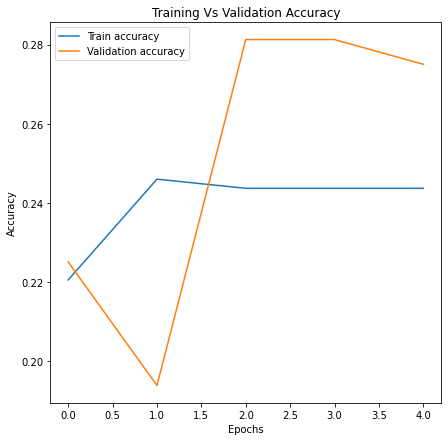

In [31]:
#plot Accuracy graph
epochs = range(len(train_acc))
plt.figure(figsize=(7,7));
plt.plot(epochs,train_acc,label ='Train accuracy');
plt.plot(epochs,val_acc,label ='Validation accuracy');
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend();
plt.title('Training Vs Validation Accuracy');

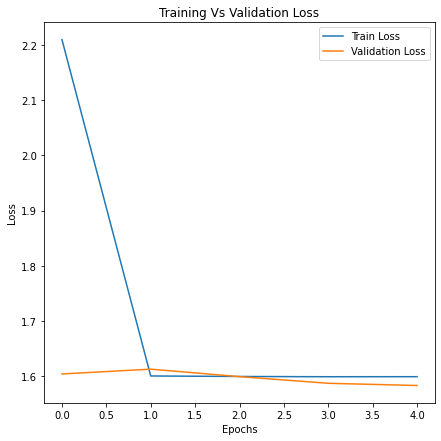

In [32]:
#plot validation graph
plt.figure(figsize=(7,7));
plt.plot(epochs,train_loss,label ='Train Loss');
plt.plot(epochs,val_loss,label ='Validation Loss');
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();
plt.title('Training Vs Validation Loss');